Visión de Fowler

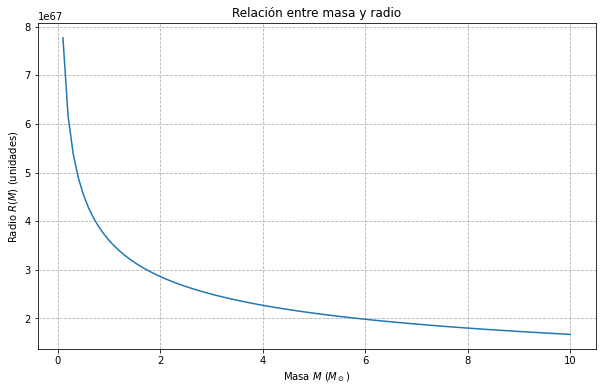

In [23]:
import numpy as np
import matplotlib.pyplot as plt

n = 10**57
h = 1.0545718 * 10**(-34)  # Js
m = 9.10938356 * 10**(-31)  # kg
g = 6.67 * 10**(-11)  # Nm²/kg²

def f(x):
    return (1.97) * n**(5/3) * h**2 * x**(-1/3) / (m * g)


x = np.linspace(0.1, 10, 100)  # 100 puntos entre 0.1 y 10, evitando el 0
y = f(x)

# Graficar la función
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.xlabel(r'Masa $M$ ($M_\odot$)')
plt.ylabel(r'Radio $R(M)$ (unidades)')
plt.title('Relación entre masa y radio')
plt.grid(True, which="both", ls="--")
plt.show()


Visión Chandrasekhar:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


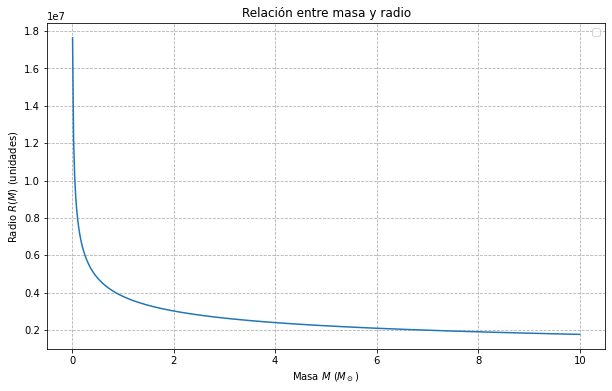

In [24]:
import numpy as np
import matplotlib.pyplot as plt


M_sun = 1  # Esto representa M☉ en unidades solares
constant = 3.8e6  # Constante dada en la fórmula

def R(M):
    return constant * (M / M_sun) ** (-1/3)

# Valores de M (en masas solares) para la gráfica
M_values = np.linspace(0.01, 10, 500)  # Desde 0.01 a 10 masas solares

# Calcula los valores de R(M) correspondientes
R_values = R(M_values)

# Crea la gráfica
plt.figure(figsize=(10, 6))
plt.plot(M_values, R_values)
plt.xlabel(r'Masa $M$ ($M_\odot$)')
plt.ylabel(r'Radio $R(M)$ (unidades)')
plt.title('Relación entre masa y radio')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


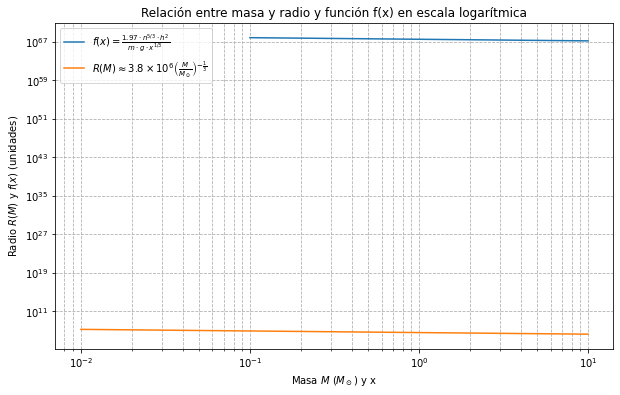

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros y constantes
n = 10**57
h = 1.0545718 * 10**(-34)  # Js
m = 9.10938356 * 10**(-31)  # kg
g = 6.67 * 10**(-11)  # Nm²/kg²

M_sun = 1  # Esto representa M☉ (masa del Sol) en unidades solares
constant = 3.8e6  # Constante dada en la fórmula

# Definir las funciones
def f(x):
    return (1.97) * n**(5/3) * h**2 * x**(-1/3) / (m * g)

def R(M):
    return constant * (M / M_sun) ** (-1/3)

# Crear datos para graficar
x = np.logspace(-1, 1, 100)  # 100 puntos entre 0.1 y 10, en escala logarítmica
y = f(x)

M_values = np.logspace(-2, 1, 100)  # Desde 0.01 a 10 masas solares en escala logarítmica
R_values = R(M_values)

# Crear la gráfica combinada
plt.figure(figsize=(10, 6))

plt.plot(x, y, label=r'$f(x) = \frac{1.97 \cdot n^{5/3} \cdot h^2}{m \cdot g \cdot x^{1/3}}$')
plt.plot(M_values, R_values, label=r'$R(M) \approx 3.8 \times 10^6 \left(\frac{M}{M_\odot}\right)^{-\frac{1}{3}}$')

plt.xscale('log')  # Escala logarítmica en el eje x
plt.yscale('log')  # Escala logarítmica en el eje y
plt.xlabel(r'Masa $M$ ($M_\odot$) y x')
plt.ylabel(r'Radio $R(M)$ y $f(x)$ (unidades)')
plt.title('Relación entre masa y radio y función f(x) en escala logarítmica')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


Modelo chido

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f_prime(x):
    my_sqrt = np.sqrt(1 + pow(x,2))
    outcome = (6*pow(x,2) - 3)*my_sqrt + pow(x, 2)*(2*pow(x, 2) - 3)/my_sqrt \
    + 3/(x + my_sqrt)*(1 + x/my_sqrt)
    return outcome

def dM_dxi(x, xi):
    return 4*np.pi*pow(xi, 2)*pow(x, 3)

def dx_dxi(M, x, xi):
    return -1*M*pow(x, 3)/f_prime(x)/pow(xi, 2)

In [4]:
init_xi = 1e-4
step_xi = 1e-3
refin_factor = 0.75 # refinement factor 
refin_limit = 1e-2
max_frac_var = 2e-2 # maximum fractional change
M_star_limit = 1e-4 # will be used to find mass of star
x_guesses = np.logspace(-2, 1.5) # for Runge-Kutta
xi_outcomes = []
M_outcomes = []

In [5]:
M_sun = 1.9891e33 # [g]
R_sun = 6.9598e10 # [cm]
M_h = 1.6736e-24 # [g]
M_e = 9.1094e-28 # [g]
Mu_e = 2
H = 6.6261e-27 # [erg s]
C = 2.9979e10 # [cm s^-1]
P_o = 6.003e22 # [dyn cm^-2]
G = 6.6726e-8 # [dyn cm^2 g^-2]
rho_o = (8.0*np.pi/3.0)*pow((M_e*C/H),3)*(Mu_e*M_h) # [g cm^-3]
R_o = np.sqrt(P_o/rho_o)/np.sqrt(G*rho_o) # [cm]

In [6]:
for x_guess in x_guesses:
    current_xi = init_xi # start very close to, but not at 0
    x_current = x_guess
    M_current = 0
    
    while x_current > M_star_limit:
        step_current_xi = step_xi
        
        # 2nd order Runge Kutta
        test_dx = step_current_xi*dx_dxi(M_current, x_current, current_xi)
        dx = step_current_xi*dx_dxi(M_current, x_current + 0.5*test_dx, current_xi + 0.5*step_current_xi)
        dM = step_current_xi*dM_dxi(x_current, current_xi + 0.5*step_current_xi)
        
        # if our mass varies too quickly, attenuate the step size
        while (M_current > refin_limit and abs(dM/M_current) > max_frac_var):
            step_current_xi = step_current_xi * refin_factor
            
            test_dx = step_current_xi*dx_dxi(M_current, x_current, current_xi)
            dx = step_current_xi*dx_dxi(M_current, x_current + 0.5*test_dx, current_xi + 0.5*step_current_xi)
            dM = step_current_xi*dM_dxi(x_current, current_xi + 0.5*step_current_xi)
        
        M_current += dM
        x_current += dx
        current_xi += step_current_xi
        
    M_outcomes.append(M_current)
    xi_outcomes.append(current_xi)

C:\Users\sebas\AppData\Local\Temp/ipykernel_24896/2908000204.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  return -1*M*pow(x, 3)/f_prime(x)/pow(xi, 2)


In [7]:
# Now, turn the outcomes into physical outcomes
M_phys = rho_o * pow(R_o,3)*np.array(M_outcomes)
M_phys /= M_sun

R_phys = R_o * np.array(xi_outcomes)
R_phys /= R_sun

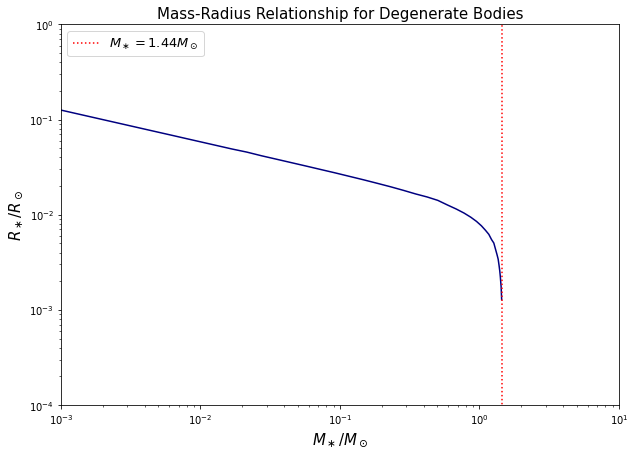

In [8]:
final_index = np.where(M_phys > 1.44)[0][0]

plt.rcParams["figure.figsize"] = [10, 7]
plt.plot(M_phys[:final_index+1],R_phys[:final_index+1], color='navy')
plt.plot([1.44,1.44],[1e-5,1e1],':', color='red',label=r'$M_\ast=1.44M_\odot$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-3,1e1])
plt.ylim([1e-4,1e0])
plt.xlabel(r'$M_\ast/M_\odot$', fontsize=15)
plt.ylabel(r'$R_\ast/R_\odot$', fontsize=15)
plt.title('Mass-Radius Relationship for Degenerate Bodies', fontsize=15)
plt.legend(fontsize=13)
plt.show()

Segun chat gpt

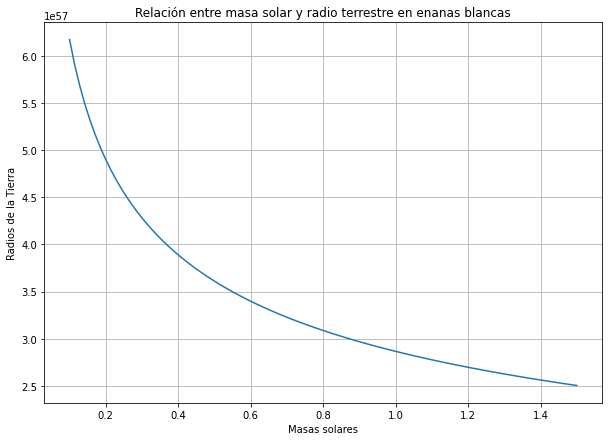

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
N = 10**57  # Número de electrones en la enana blanca
hbar = 1.0545718e-34  # Constante reducida de Planck (en J*s)
m_e = 9.10938356e-31  # Masa del electrón (en kg)
G = 6.67430e-11  # Constante de gravitación universal (en m^3/kg/s^2)

# Función para calcular el radio de la enana blanca en función de la masa
def calcular_radio(masa):
    return (1.97 * ((N**(5/3) * hbar**2) / (m_e * G)) / masa**(1/3))

# Generar datos
masas_solares = np.linspace(0.1, 1.5, 100)  # Masas solares
radios_tierra = [calcular_radio(masa * 1.989e30) for masa in masas_solares]  # Radios de la Tierra

# Graficar
plt.plot(masas_solares, radios_tierra)
plt.xlabel('Masas solares')
plt.ylabel('Radios de la Tierra')
plt.title('Relación entre masa solar y radio terrestre en enanas blancas')
plt.grid(True)
plt.show()


Chat gpt 2

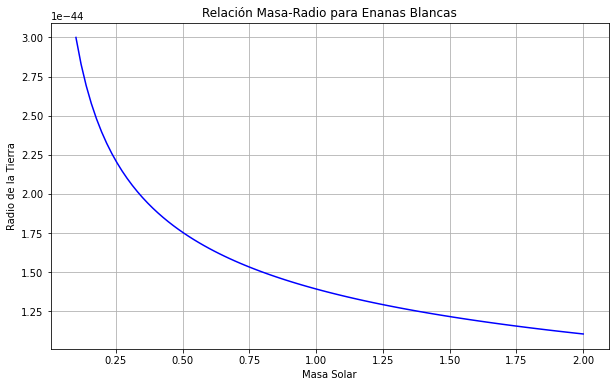

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
N = 1.97  # Factor de proporcionalidad
h_bar = 1.0545718e-34  # Constante reducida de Planck en J*s
m_e = 9.10938356e-31  # Masa del electrón en kg
G = 6.67430e-11  # Constante de gravitación universal en m^3/kg/s^2
M_sun = 1.989e30  # Masa del Sol en kg
R_earth = 6.371e6  # Radio de la Tierra en metros

# Función para calcular el radio de la enana blanca
def calculate_radius(M):
    return N * ((N**(5/3) * h_bar**2) / (m_e * G)) * (M**(-1/3))

# Masas solares para el eje x
masses = np.linspace(0.1, 2, 100) * M_sun  # Rango de masas de 0.1 a 2 masas solares

# Calcular radios correspondientes
radii = calculate_radius(masses)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(masses / M_sun, radii / R_earth, color='blue', linestyle='-')
plt.xlabel('Masa Solar')
plt.ylabel('Radio de la Tierra')
plt.title('Relación Masa-Radio para Enanas Blancas')
plt.grid(True)
plt.show()


Chat gpt 3

C:\Users\sebas\AppData\Local\Temp/ipykernel_24896/2492386492.py:11: RuntimeWarning: divide by zero encountered in power
  return (1.97) * n**(5/3) * h**2 * x**(-1/3) / (m * g)


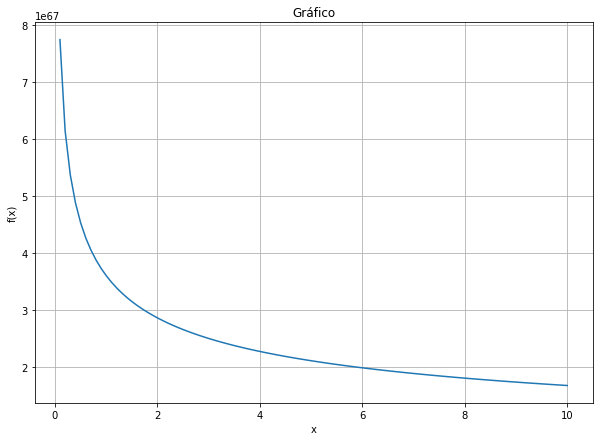

In [11]:
import numpy as np
import matplotlib.pyplot as plt

n = 10**57
h = 1.0545718e-34  # Js
m = 9.10938356e-31  # kg
g = 6.67e-11  # Nm²/kg²

# Definir la función
def f(x):
    return (1.97) * n**(5/3) * h**2 * x**(-1/3) / (m * g)

# Crear datos para graficar
x = np.linspace(0, 10, 100)  # 100 puntos entre 0 y 10
y = f(x)

# Graficar la función
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfico')
plt.grid(True)
plt.show()
